In [4]:
import pandas as pd
import numpy as np
import osmnx as ox
import networkx as nx
import geopandas as gpd
#import sharedstreets.tile
#import mercantile
from shapely.geometry import Point, shape, MultiPoint, MultiPolygon
from functools import partial
import pyproj
from shapely.ops import transform, nearest_points

In [2]:
# polygon boundry
client_ploys_gdf = gpd.read_file("GIS/TAZOfficialWCurrentForecasts.shp")
# project to lat-long
polygon_df_new = client_ploys_gdf.to_crs(epsg = 4326)

In [35]:
# get street network from polygon
G = ox.graph_from_polygon(polygon_df_new['geometry'].unary_union, network_type='drive')
# graph to geodataframe
G_drive_link_gdf = ox.graph_to_gdfs(G, nodes = False, edges = True)
G_drive_node_gdf = ox.graph_to_gdfs(G, nodes = True, edges = False)

G_drive_node_gdf.to_file("data/network-shape_MetCouncil_full/osm_networktype_drive/drive_node_0319.shp")

list_col = ['access', 'bridge', 'osmid', 'highway', 'lanes', 'oneway', 'maxspeed', 'name', 'ref']
G_drive_link_gdf_copy = G_drive_link_gdf.copy()
for i in list_col:
    G_drive_link_gdf_copy[i] = G_drive_link_gdf_copy[i].astype(str)
    G_drive_link_gdf_copy[i] = G_drive_link_gdf_copy[i].str.replace("'", "").str.replace("[", "").str.replace("]", "")
    G_drive_link_gdf_copy[i] = G_drive_link_gdf_copy[i].str.split(',').str[0]
print(G_drive_link_gdf_copy.groupby(['osmid','u','v']).count()['geometry'].sum())
G_drive_link_gdf_copy.to_file("data/network-shape_MetCouncil_full/osm_networktype_drive/drive_edge_withname_0319.shp")

C:\ProgramData\Anaconda3\lib\site-packages\geopandas\io\file.py:108: FionaDeprecationWarning: Use fiona.Env() instead.
  with fiona.drivers():


428576


In [45]:
#G_drive_link_gdf['osmid_str'] = G_drive_link_gdf['osmid'].astype('|S')
G_drive_link_gdf.to_file("data/network-shape_MetCouncil_full/osm_networktype_drive/drive_edge_withname_0319_test.shp")

C:\ProgramData\Anaconda3\lib\site-packages\geopandas\io\file.py:108: FionaDeprecationWarning: Use fiona.Env() instead.
  with fiona.drivers():


ValueError: Invalid field type <class 'list'>

In [27]:
G_drive_node_gdf[G_drive_node_gdf.osmid == '6264440161']
#G_drive_node_gdf.shape

,highway,osmid,ref,x,y,geometry
6264440161,NaN,6264440161,NaN,-93.0863,44.9946,POINT (-93.08632179999999 44.9945938)


In [15]:
ox.save_load.save_graphml(G, filename = "C:/Users/wangs1/Documents/Met_Council/data/network-shape_MetCouncil_full/osm_networktype_drive/drive.graphml")

In [16]:
G_load = ox.save_load.load_graphml("C:/Users/wangs1/Documents/Met_Council/data/network-shape_MetCouncil_full/osm_networktype_drive/drive.graphml")

In [37]:
route = nx.shortest_path(G, 592629365, 33371255)#, weight = 'DISTANCE')
route

NetworkXNoPath: No path between 592629365 and 33371255.

In [34]:
route = nx.shortest_path(G_load, 568972355, 33372495, weight = 'DISTANCE')
route
G_drive_node_gdf[G_drive_node_gdf.osmid == '33372497']

,highway,osmid,ref,x,y,geometry
33372497,traffic_signals,33372497,NaN,-93.4452,44.9704,POINT (-93.4452392 44.9703889)


In [134]:
#list_col = ['osmid', 'highway', 'lanes', 'maxspeed', 'name', 'service']
list_col = ['access', 'bridge', 'osmid', 'highway', 'lanes', 'oneway', 'maxspeed', 'name', 'ref']
G_gdf_copy = G_gdf.copy()
for i in list_col:
    G_gdf_copy[i] = G_gdf_copy[i].astype(str)
    G_gdf_copy[i] = G_gdf_copy[i].str.replace("'", "").str.replace("[", "").str.replace("]", "")
    G_gdf_copy[i] = G_gdf_copy[i].str.split(',').str[0]
print(G_gdf_copy.groupby(['osmid','u','v']).count()['geometry'].sum())
G_gdf_copy.to_file("data/network-shape_MetCouncil_full/osm_networktype_drive/drive_edge_withname.shp")

C:\ProgramData\Anaconda3\lib\site-packages\geopandas\io\file.py:108: FionaDeprecationWarning: Use fiona.Env() instead.
  with fiona.drivers():


In [153]:
G_gdf_copy['highway'].value_counts()

residential       310560
tertiary           75680
secondary          19819
primary             7776
unclassified        4197
motorway_link       3407
motorway            2072
trunk               1957
tertiary_link        681
secondary_link       543
trunk_link           528
primary_link         315
living_street        230
road                  84
planned               18
rest_area              4
turning_loop           2
Name: highway, dtype: int64

In [142]:
G_drive_node_gdf = ox.graph_to_gdfs(G, nodes = True, edges = False)
G_drive_node_gdf.to_file("data/network-shape_MetCouncil_full/osm_networktype_drive/drive_node.shp")

In [4]:
G_walk = ox.graph_from_polygon(polygon_df_new['geometry'].unary_union, network_type='walk')
# graph to geodataframe
G_walk_gdf = ox.graph_to_gdfs(G_walk, nodes = False, edges = True)

In [5]:
G_walk_node_gdf = ox.graph_to_gdfs(G_walk, nodes = True, edges = False)
print(G_walk_node_gdf.shape)
print(G_walk_node_gdf['osmid'].nunique())
G_walk_node_gdf.to_file("data/network-shape_MetCouncil_full/osm_networktype_walk/walk_node.shp")

(333610, 6)
333610


C:\ProgramData\Anaconda3\lib\site-packages\geopandas\io\file.py:108: FionaDeprecationWarning: Use fiona.Env() instead.
  with fiona.drivers():


In [141]:
list_col = ['access', 'bridge', 'osmid', 'highway', 'lanes', 'oneway', 'maxspeed', 'name', 'ref', 'service', 'width']
G_walk_gdf_copy = G_walk_gdf.copy()
for i in list_col:
    G_walk_gdf_copy[i] = G_walk_gdf_copy[i].astype(str)
    G_walk_gdf_copy[i] = G_walk_gdf_copy[i].str.replace("'", "").str.replace("[", "").str.replace("]", "")
    G_walk_gdf_copy[i] = G_walk_gdf_copy[i].str.split(',').str[0]
print(G_walk_gdf_copy.groupby(['osmid','u','v']).count()['geometry'].sum())
G_walk_gdf_copy.to_file("data/network-shape_MetCouncil_full/osm_networktype_walk/walk_edge.shp")

950894


In [1]:
G_walk_node_gdf.crs

NameError: name 'G_walk_node_gdf' is not defined

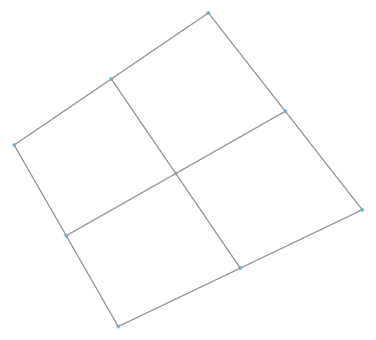

In [16]:
G_temp = ox.graph_from_point((44.948216, -93.091612), distance=20, network_type='walk')
# graph to geodataframe
ox.plot_graph(G_temp)
G_temp_gdf = ox.graph_to_gdfs(G_temp, nodes = False, edges = True)
G_temp_gdf.oneway = G_temp_gdf.oneway.astype(int)
G_temp_gdf.to_file("data/sharedstreet_playground/sample_shp/sample.geojson", driver = 'GeoJSON')
G_temp_gdf.to_file("data/sharedstreet_playground/sample_shp/sample.shp")